#House Price Prediction using Machine Learning in Python

##Data Set

You can download the dataset from [this](https://docs.google.com/spreadsheets/d/1PzM4sQjuhlXbjVdiqqVu-qtnfHB9Zra-/edit?usp=sharing&ouid=104773012695175212531&rtpof=true&sd=true) link.

The dataset contains 13 features :

| No | Column Name       | Description                                                     |
|----|-------------------|-----------------------------------------------------------------|
| 1  | Id                | To count the records.                                           |
| 2  | MSSubClass        | Identifies the type of dwelling involved in the sale.           |
| 3  | MSZoning          | Identifies the general zoning classification of the sale.       |
| 4  | LotArea           | Lot size in square feet.                                        |
| 5  | LotConfig         | Configuration of the lot.                                       |
| 6  | BldgType          | Type of dwelling.                                               |
| 7  | OverallCond       | Rates the overall condition of the house.                       |
| 8  | YearBuilt         | Original construction year.                                     |
| 9  | YearRemodAdd      | Remodel date (same as construction date if no remodeling or additions). |
| 10 | Exterior1st       | Exterior covering on house.                                     |
| 11 | BsmtFinSF2        | Type 2 finished square feet.                                    |
| 12 | TotalBsmtSF       | Total square feet of basement area.                             |
| 13 | SalePrice         | To be predicted.                                                |


**Hint**: Load one from sklearn

# Importing Libraries and Dataset

Here we are using:

- **Pandas** – To load the Dataframe
- **Matplotlib** – To visualize the data features i.e. barplot
- **Seaborn** – To see the correlation between features using heatmap


In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Step 2: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/REDI_FINAL_DURMAZ/HousePricePrediction.xlsx'
dataset = pd.read_excel(file_path)

# Step 4: Print the first 5 records of the dataset
print(dataset.head(5))

Mounted at /content/drive/
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
# Shape method will show us the dimension of the dataset.
dataset.shape

(2919, 13)

# Data Preprocessing

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them.

In [4]:
dataset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [5]:
obj_ = (dataset.dtypes == 'object')
# print (obj_)
# object_col = list(obj_)
# print (object_col)
# object_col2 = list(obj_[obj_])
# print (object_col2)
object_cols = list(obj_[obj_].index)
# print (object_cols)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl_ = (dataset.dtypes == 'float')
fl_cols = list(fl_[fl_].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


# Exploratory Data Analysis

EDA refers to the deep analysis of data so as to discover different patterns and spot anomalies. Before making inferences from data it is essential to examine all your variables.

Categorical columns (object type) cannot be included in the correlation matrix because correlation is only meaningful for numeric data. Thus, we need to exclude the categorical columns from our dataset before computing the correlation matrix.

So here let’s make a **heatmap** using seaborn library.

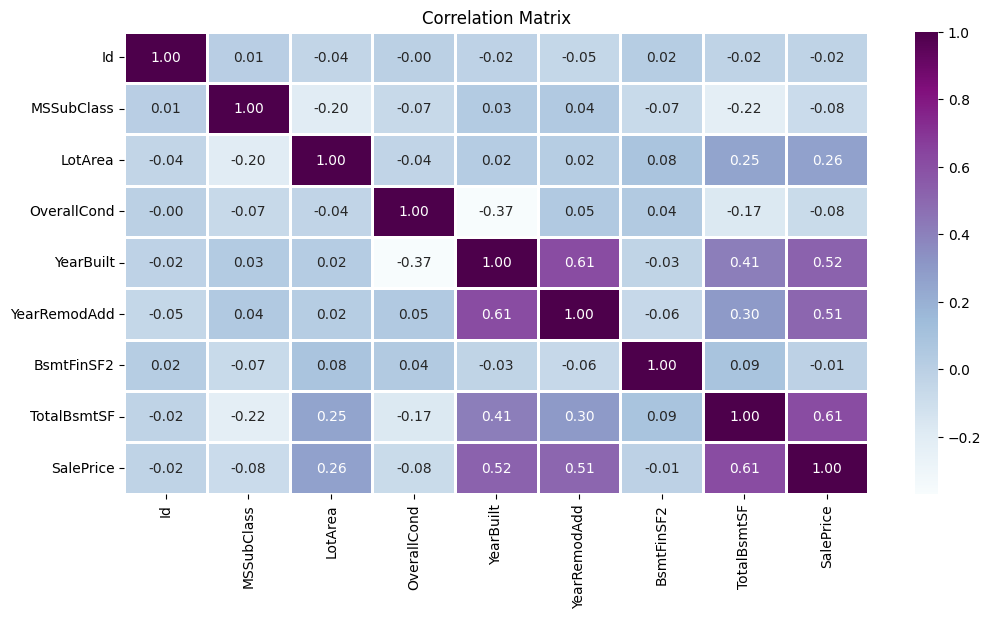

In [6]:
# Extract only the numeric columns from the dataset
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
# print ("numeric_cols", numeric_cols)
numeric_data = dataset[numeric_cols]
# print (numeric_data)

# Create the Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
            cmap='BuPu',
            annot=True,  # annot=True added to show correlation values in cells
            fmt='.2f',
            linewidths=2)
plt.title('Correlation Matrix')
plt.show()

There is a correlation between 'Sale Price' and 'TotalBsmtFinSF2', 'YearBuilt', 'YearRemodAdd'

To analyze the different categorical features we use the barplot.

<ipython-input-10-d3d737fb2778>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=object_cols,y=unique_values, palette='BuPu')


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

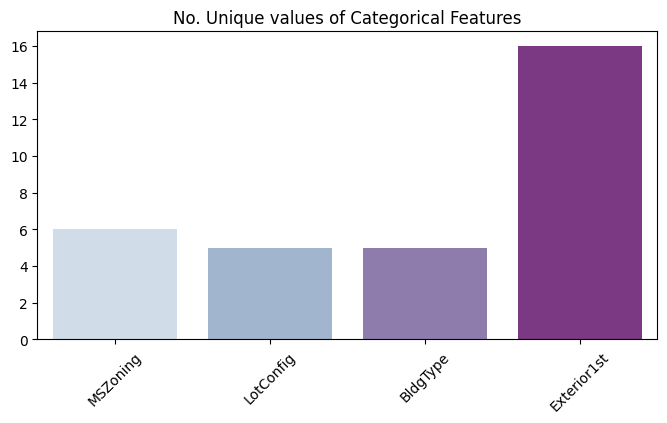

In [10]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
  # print(dataset[col].unique())
plt.figure(figsize=(8,4))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=45)
sns.barplot(x=object_cols,y=unique_values, palette='BuPu')

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To find out the actual count of each category we can plot the bar graph of each four features separately.

<ipython-input-11-927b111cde12>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)
<ipython-input-11-927b111cde12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='BuPu')
<ipython-input-11-927b111cde12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(y.index), y=y, palette='BuPu')
<ipython-input-11-927b111cde12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

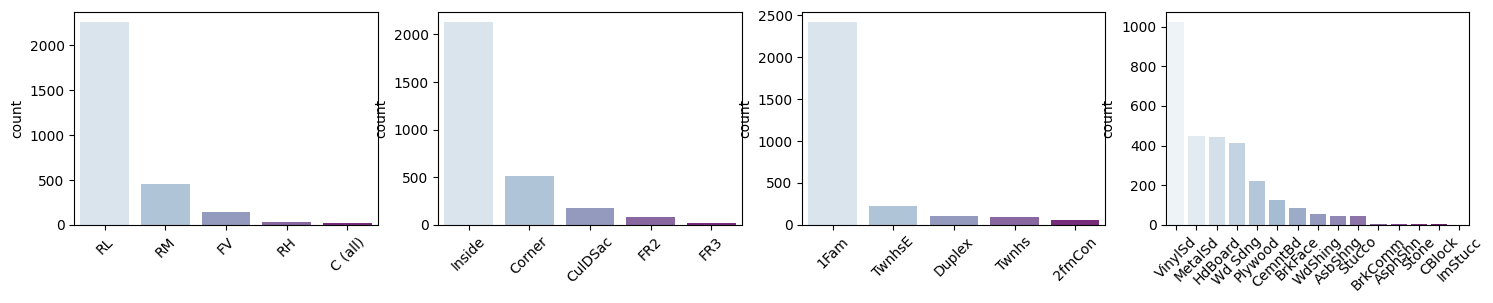

In [11]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=45)
	sns.barplot(x=list(y.index), y=y, palette='BuPu')
	index += 1

# Data Cleaning

Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

- We can easily delete the column/row (if the feature or record is not much important).
- Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

In [12]:
print(dataset.columns)
missing_in_SalePrice = dataset['SalePrice'].isnull().sum()
print (missing_in_SalePrice)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')
1459


In [13]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())

In [14]:
missing_values= dataset.isnull().sum()
print (missing_values)

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64


Drop records with null values (as the empty records are very less).

In [15]:
new_dataset = dataset.dropna()

In [16]:
missing_values= dataset.isnull().sum()
print ("dataset")
print (missing_values)
print ('\n')

missing_values_new_dataset= new_dataset.isnull().sum()
print ("new_dataset")
print (missing_values_new_dataset)
print ('\n')

dataset
Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64


new_dataset
Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64




# OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop.

In [19]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [20]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
# print (OH_cols.index)
# print (new_dataset.index)
OH_cols.columns = OH_encoder.get_feature_names_out()
# print (OH_cols)
# print (object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
# print (df_final)
df_final = pd.concat([df_final, OH_cols], axis=1)
# print (df_final)

# Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

# Model and Accuracy
As we have to train the model to determine the continuous values, so we will be using these regression models.

- SVM-Support Vector Machine
- Random Forest Regressor
- Linear Regressor

To calculate loss we will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library.

# SVM – Support vector Machine

SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [23]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18704778826125987


# Random Forest Regression

Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [24]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.07802555146295966

# Linear Regression

Linear Regression predicts the final output-dependent value based on the given independent features. Like, here we have to predict SalePrice depending on features like MSSubClass, YearBuilt, BldgType, Exterior1st etc.

In [25]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18633155158087458


# Calculating R²

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_valid, Y_pred)
print(f"R²: {r2}")

R²: 0.37504998727464645


# CatBoost Classifier

CatBoost is a machine learning algorithm implemented by Yandex and is open-source. It is simple to interface with deep learning frameworks such as Apple’s Core ML and Google’s TensorFlow. Performance, ease-of-use, and robustness are the main advantages of the CatBoost library.

In [29]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [30]:
# This code is contributed by @amartajisce
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 55858.4377716	total: 80.6ms	remaining: 1m 20s
1:	learn: 54549.6738251	total: 86.2ms	remaining: 43s
2:	learn: 53194.6163146	total: 100ms	remaining: 33.2s
3:	learn: 52019.1348408	total: 115ms	remaining: 28.6s
4:	learn: 50821.2323253	total: 129ms	remaining: 25.7s
5:	learn: 49729.4388396	total: 136ms	remaining: 22.5s
6:	learn: 48728.8850805	total: 150ms	remaining: 21.3s
7:	learn: 47843.2737463	total: 163ms	remaining: 20.3s
8:	learn: 46753.9666335	total: 176ms	remaining: 19.4s
9:	learn: 45775.4479191	total: 201ms	remaining: 19.9s
10:	learn: 44954.7325349	total: 213ms	remaining: 19.2s
11:	learn: 44098.7182761	total: 237ms	remaining: 19.5s
12:	learn: 43225.8648186	total: 248ms	remaining: 18.8s
13:	learn: 42430.6865961	total: 274ms	remaining: 19.3s
14:	learn: 41719.8701086	total: 292ms	remaining: 19.1s
15:	learn: 41130.2588022	total: 311ms	remaining: 19.2s
16:	learn: 40498.3072297	total: 342ms	remaining: 19.8s
17:	learn: 39806.6880976	total: 365ms	remain

0.7906929139689325

# Conclusion
Clearly, SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. To get much better results ensemble learning techniques like Bagging and Boosting can also be used.